## Assignment 03 - Decision Trees
### Maitri Patel

In this assignment we will demonstrate the learning process of the triangle using scikit-Learn by modifying the given code by the professor.
The triangle has interior angles 90°, 63°, and 27°, with the sides a = 1.123   b = 0.51   c = 1. 
The co-ordinates are A: [1, 0] , B: [0, 0] , C: [1. 0.51]

In [1]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [2]:
# learn an axis-aligned rectangle and circle using 2 features

In [2]:
# generate data for an axis-aligned rectangle with vertex coordinates
# (0.5,0.5),(0.5,1.5),(1.5,0.5),(1.5,1.5) 
# for points within a distance of 0.6 from the point (1.0,1.0) y=-1
# otherwise points inside the rectangke, y=1 and for points outside the rectangle, y=0.

npts = 10000

X2 = np.zeros((npts,2))
y2 = np.zeros(npts)

for i in range(0,npts): 
    X2[i,0] = np.random.uniform(0.0,2.0) 
    X2[i,1] = np.random.uniform(0.0,2.0) 
    if (((X2[i,0]-1.0)**2+(X2[i,1]-1.0)**2)<= 0.3):
        y2[i] = -1
    elif ((X2[i,0]<=0.5) or (X2[i,0]>1.5) or (X2[i,1]<=0.5) or (X2[i,1]>1.5)):
        y2[i] = 0
    else:
        y2[i] = 1
        

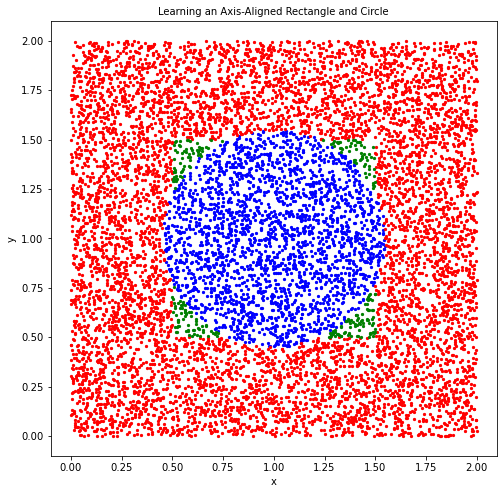

In [11]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Axis-Aligned Rectangle and Circle', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X2[y2==-1, 0], y = X2[y2==-1, 1], color='blue', label='-1', s=5)
plt.scatter(x = X2[y2==0, 0], y = X2[y2==0, 1], color='red', label='0', s=5)
plt.scatter(x = X2[y2==1, 0], y = X2[y2==1, 1], color='green', label='1', s=5)

plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [7]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
         X2, y2, test_size=0.50, random_state=0)


In [12]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X2_train, y2_train)

    X2_combined = np.vstack((X2_train, X2_test))
    y2_combined = np.hstack((y2_train, y2_test))

    # optional outputs
    z = tree.apply(X2_combined)
    #print(z)
    dp = tree.decision_path(X2_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X2_train,y2_train)
    Errors[i,1] = 1 - tree.score(X2_test,y2_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.26680000000000004 0.26959999999999995
2 0.26680000000000004 0.26959999999999995
3 0.17759999999999998 0.17700000000000005
4 0.05579999999999996 0.0534
5 0.05059999999999998 0.047799999999999954
6 0.0474 0.045399999999999996
7 0.03979999999999995 0.036800000000000055
8 0.03480000000000005 0.03400000000000003
9 0.0262 0.025800000000000045
10 0.01639999999999997 0.01959999999999995


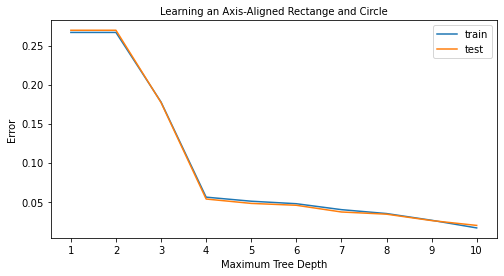

In [13]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Axis-Aligned Rectange and Circle', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [ ]:
# plot the final decision gree
export_graphviz(tree, out_file='T2.dot', feature_names=['x','y'])
with open('T2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [58]:
# learn an axis-aligned rectangle and circle using 3 features

In [15]:
# generate data

npts = 10000

X3 = np.zeros((npts,3))
y3 = np.zeros(npts)

for i in range(0,npts): 
    X3[i,0] = np.random.uniform(0.0,2.0) 
    X3[i,1] = np.random.uniform(0.0,2.0) 
    X3[i,2] = (X3[i,0]-1.0)**2+(X3[i,1]-1.0)**2
    if (X3[i,2]<= 0.3):
        y3[i] = -1
    elif ((X3[i,0]<=0.5) or (X3[i,0]>1.5) or (X3[i,1]<=0.5) or (X3[i,1]>1.5)):
        y3[i] = 0
    else:
        y3[i] = 1
  

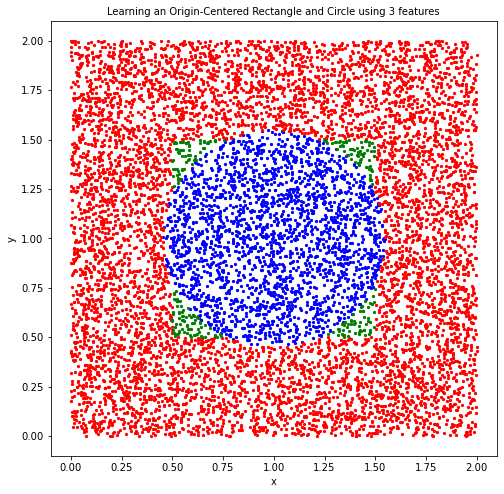

In [17]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Rectangle and Circle using 3 features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X3[y3==-1, 0], y = X3[y3==-1, 1], color='blue', label='0', s=5)
plt.scatter(x = X3[y3==0, 0], y = X3[y3==0, 1], color='red', label='0', s=5)
plt.scatter(x = X3[y3==1, 0], y = X3[y3==1, 1], color='green', label='1', s=5)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [18]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(
         X3, y3, test_size=0.50, random_state=0)


In [19]:
# Fit for various depth trees
MaxDepth = 10
DotFileName ='T3.dot'
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X3_train, y3_train)

    X3_combined = np.vstack((X3_train, X3_test))
    y3_combined = np.hstack((y3_train, y3_test))

    # optional outputs
    z = tree.apply(X3_combined)
    #print(z)
    dp = tree.decision_path(X3_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X3_train,y3_train)
    Errors[i,1] = 1 - tree.score(X3_test,y3_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.027200000000000002 0.026800000000000046
2 0.027200000000000002 0.026800000000000046
3 0.027200000000000002 0.026800000000000046
4 0.018399999999999972 0.02080000000000004
5 0.017000000000000015 0.01980000000000004
6 0.005800000000000027 0.009399999999999964
7 0.0040000000000000036 0.007199999999999984
8 0.0016000000000000458 0.0033999999999999586
9 0.00039999999999995595 0.0048000000000000265
10 0.00019999999999997797 0.0031999999999999806


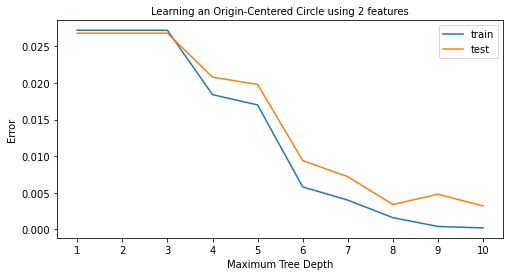

In [20]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 2 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [ ]:
# plot the final decision gree
export_graphviz(tree, out_file='T3.dot', feature_names=['x','y','x^2+y^2'])
with open('T3.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Extending the code to learn a Triangle

generate points with random coordinates in the interval [0, 2).

In [61]:
# generate data for a triangle 
npts = 10000

X7 = np.zeros((npts,2))
y7 = np.zeros(npts)

for i in range(0,npts): 
    X7[i,0] = np.random.uniform(-1.0,1.0) 
    X7[i,1] = np.random.uniform(-1.0,1.0)

    if (((X7[i,0])+(X7[i,1])) <= 0 and X7[i,1]>=-0.5 and X7[i,0]>=-0.5):
        y7[i] = 0
    else:
        y7[i] = 1

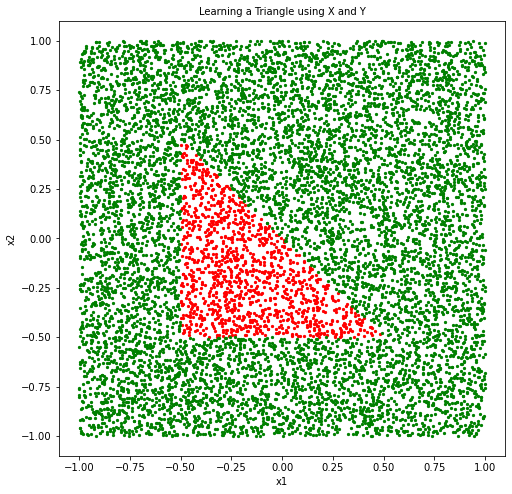

In [63]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a Triangle using X and Y', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X7[y7==0, 0], y = X7[y7==0, 1], color='red', label='0', s=5)
plt.scatter(x = X7[y7==1, 0], y = X7[y7==1, 1], color='green', label='1', s=5)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [64]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X7_train, X7_test, y7_train, y7_test = train_test_split(
         X7, y7, test_size=0.50, random_state=0)

In [65]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X7_train, y7_train)

    X7_combined = np.vstack((X7_train, X7_test))
    y7_combined = np.hstack((y7_train, y7_test))

    # optional outputs
    z = tree.apply(X7_combined)
    #print(z)
    dp = tree.decision_path(X7_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X7_train,y7_train)
    Errors[i,1] = 1 - tree.score(X7_test,y7_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.12519999999999998 0.12160000000000004
2 0.12519999999999998 0.12160000000000004
3 0.125 0.12180000000000002
4 0.06879999999999997 0.06879999999999997
5 0.051000000000000045 0.04820000000000002
6 0.022599999999999953 0.022800000000000042
7 0.01639999999999997 0.01739999999999997
8 0.006399999999999961 0.01100000000000001
9 0.0040000000000000036 0.008600000000000052
10 0.0011999999999999789 0.006000000000000005


In [ ]:
# plot the final decision gree
export_graphviz(tree, out_file='T7.dot', feature_names=['x','y,'], filled=True, rounded=True)
with open('T7.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

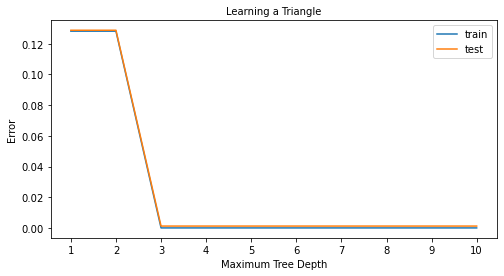

In [84]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning a Triangle', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()

In [75]:
# learn a triangle using features x, y, x - y

# generate data for a right triangle 

npts = 10000

X8 = np.zeros((npts,3))
y8 = np.zeros(npts)

for i in range(0,npts): 
    X8[i,0] = np.random.uniform(-1.0,1.0) 
    X8[i,1] = np.random.uniform(-1.0,1.0)
    X8[i,2] = X8[i,1] - X8[i,0]

    if ((X8[i,0] + X8[i,1]) <= 0 and X8[i,1]>=-0.5 and X8[i,0]>=-0.5):
        y8[i] = 0
    else:
        y8[i] = 1

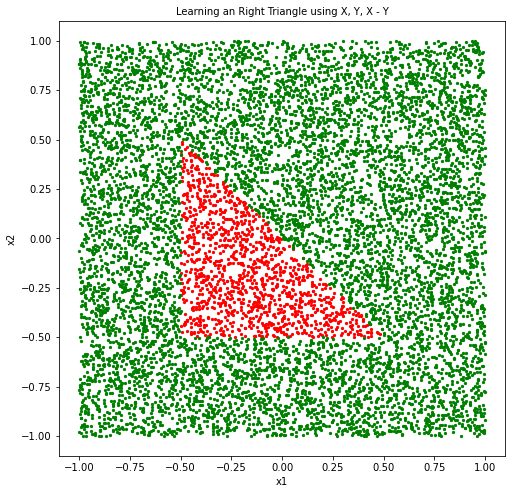

In [70]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Right Triangle using X, Y, X - Y', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X8[y8==0, 0], y = X8[y8==0, 1], color='red', label='0', s=5)
plt.scatter(x = X8[y8==1, 0], y = X8[y8==1, 1], color='green', label='1', s=5)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [71]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X8_train, X8_test, y8_train, y8_test = train_test_split(
         X8, y8, test_size=0.50, random_state=0)

In [72]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X8_train, y8_train)

    X8_combined = np.vstack((X8_train, X8_test))
    y8_combined = np.hstack((y8_train, y8_test))

    # optional outputs
    z = tree.apply(X8_combined)
    #print(z)
    dp = tree.decision_path(X8_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X8_train,y8_train)
    Errors[i,1] = 1 - tree.score(X8_test,y8_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.12560000000000004 0.12580000000000002
2 0.12560000000000004 0.12580000000000002
3 0.12560000000000004 0.12580000000000002
4 0.05600000000000005 0.05779999999999996
5 0.046599999999999975 0.05700000000000005
6 0.013800000000000034 0.023800000000000043
7 0.011399999999999966 0.01859999999999995
8 0.0030000000000000027 0.011600000000000055
9 0.0023999999999999577 0.010000000000000009
10 0.0006000000000000449 0.008000000000000007


In [ ]:
# plot the final decision gree
export_graphviz(tree, out_file='T8.dot', feature_names=['x','y','x-y'], filled=True, rounded=True)
with open('T8.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

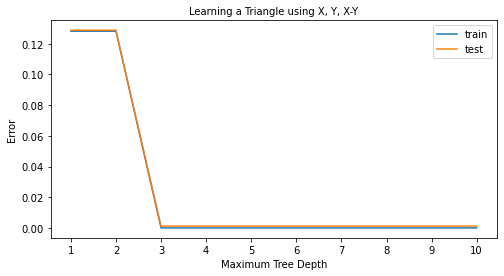

In [83]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning a Triangle using X, Y, X-Y', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()

In [76]:
# learn a triangle using features x, y, x + y


npts = 10000

X9 = np.zeros((npts,3))
y9 = np.zeros(npts)

for i in range(0,npts): 
    X9[i,0] = np.random.uniform(-1.0,1.0) 
    X9[i,1] = np.random.uniform(-1.0,1.0)
    X9[i,2] = X9[i,1] + X9[i,0]

    if ((X9[i,0] + X9[i,1]) <= 0 and X9[i,1]>=-0.5 and X9[i,0]>=-0.5):
        y9[i] = 0
    else:
        y9[i] = 1

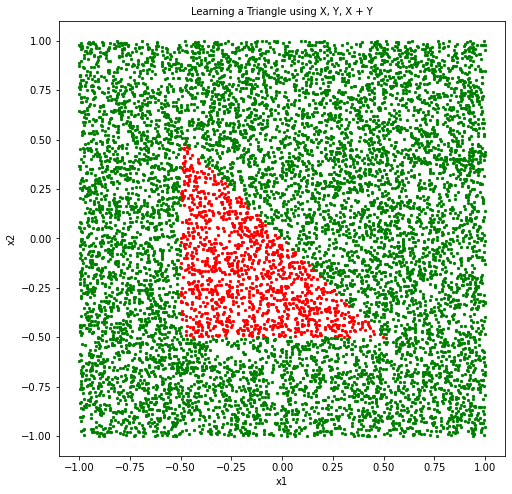

In [82]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a Triangle using X, Y, X + Y', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X9[y9==0, 0], y = X9[y9==0, 1], color='red', label='0', s=5)
plt.scatter(x = X9[y9==1, 0], y = X9[y9==1, 1], color='green', label='1', s=5)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()


In [78]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X9_train, X9_test, y9_train, y9_test = train_test_split(
         X9, y9, test_size=0.50, random_state=0)

In [79]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X9_train, y9_train)

    X9_combined = np.vstack((X9_train, X9_test))
    y9_combined = np.hstack((y9_train, y9_test))

    # optional outputs
    z = tree.apply(X9_combined)
    #print(z)
    dp = tree.decision_path(X9_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X9_train,y9_train)
    Errors[i,1] = 1 - tree.score(X9_test,y9_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.12819999999999998 0.12880000000000003
2 0.12819999999999998 0.12880000000000003
3 0.0 0.0011999999999999789
4 0.0 0.0011999999999999789
5 0.0 0.0011999999999999789
6 0.0 0.0011999999999999789
7 0.0 0.0011999999999999789
8 0.0 0.0011999999999999789
9 0.0 0.0011999999999999789
10 0.0 0.0011999999999999789


In [ ]:
# plot the final decision gree
export_graphviz(tree, out_file='T9.dot', feature_names=['x','y','x-y'], filled=True, rounded=True)
with open('T9.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

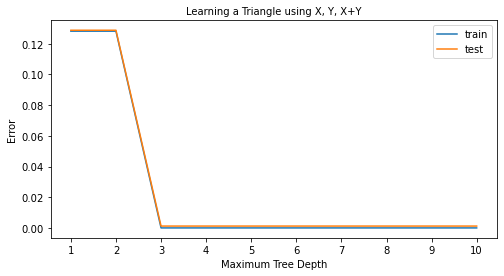

In [81]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning a Triangle using X, Y, X+Y', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()

## Conclusion

I extended the approach of learning shapes using decision trees to learn a triangle. I used a concept that for any that lies inside a triangle, the three angles generated from the 3 possible combinations of that point alongwith any two points on the triangle, gives a total area equal to the area of the whole triangle.

I created classes based on this in a 2-dimensional Numpy array of points lying inside and outside the triangle.

I analyzed the convergence of the error by using various tree depths and traing the decision tree classifier.

When we use only the base x and y or x, y, and x-y as features, we don't see any changes in the results of classifier for depths 1, 2, and 3 but than the results began to decrease rapidly. When we use x, y, and x+y, it initially gave an error of about 0.125 but the as we use all the 3 features, it gradually decreases to 0. 
One thing to note was that all 3 triangle cases started with the same errors of 0.12 when the depth was less than 3.

Therefore, as we add the third feature x+y the speed of the test error line approching zero increases rapidly. So there will be no uncertainty as all the data at this level belongs to a single class.